### Developing a Convolutional Neural Network Classification Model
### Name :BHAVATHARANI S

### Reg.No : 212223230032

In [1]:
#import lobraries
import torch 
import torch.nn as nn #neural network inside torch
import torch.nn.functional as F

In [2]:
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
transform=transforms.ToTensor() #Convert array to torch


In [5]:
train_data=datasets.MNIST(root="../Data",train=True,download=True,transform=transform)
train_data #Download the dataset for training data

PermissionError: [WinError 5] Access is denied: '../Data'

In [7]:
test_data=datasets.MNIST(root="../Data",train=True,download=True,transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
torch.manual_seed(101)
train_loader=DataLoader(train_data, batch_size=100, shuffle=True) #100 batch size for training and shuffle mode
test_loader=DataLoader(test_data, batch_size=500, shuffle=False)

In [9]:
#1 - color channel, 6 filters, 3x3 matrics, 1 stride
conv1=nn.Conv2d(1,6,3,1) # --> 6 filters --> pooling -->conv2
#6 input filters conv1, 16 filters, 3x3 matrics, 1 stride
conv2=nn.Conv2d(6,16,3,1)

In [10]:
for i, (x_train,y_train) in enumerate(train_data):
    break

In [11]:
x_train


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [12]:
x_train.shape

torch.Size([1, 28, 28])

In [13]:
x=x_train.view(1,1,28,28)
x

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
x=F.relu(conv1(x))
x.shape

torch.Size([1, 6, 26, 26])

In [15]:
x=F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 6, 13, 13])

In [16]:
x=F.relu(conv2(x))
x.shape

torch.Size([1, 16, 11, 11])

In [17]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([1, 16, 5, 5])

In [18]:
class ConvolutionalNetwork(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [19]:
torch.manual_seed(42)
model=ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
for param in model.parameters(): #ANN to CNN
    print(param.numel())

54
6
864
16
48000
120
10080
84
840
10


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [25]:
import time
start_time = time.time()
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# for loop epochs 
for i in range(epochs):
    
    trn_corr = 0
    tst_corr = 0


    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # Apply the model
        y_pred = model(X_train)  # we not flatten X-train here
        loss = criterion(y_pred, y_train)
 
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()  # Trure 1 / False 0 sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%600 == 0:
            print(f'epoch: {i}  batch: {b} loss: {loss.item()}')
        
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
current_time = time.time()
total = current_time - start_time
print(f'Training took {total/60} minutes')

epoch: 0  batch: 600 loss: 0.04722031578421593
epoch: 1  batch: 600 loss: 0.015726769343018532
epoch: 2  batch: 600 loss: 0.006646317895501852
epoch: 3  batch: 600 loss: 0.004247477278113365
epoch: 4  batch: 600 loss: 0.00023973664792720228
Training took 10.398400819301605 minutes


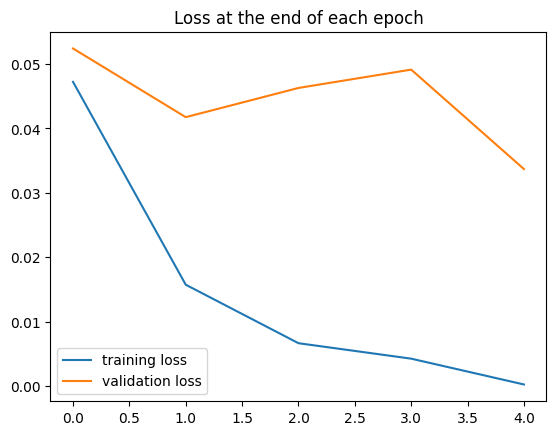

In [26]:
train_losses = [t.detach().numpy() for t in train_losses]
test_losses = [t.detach().numpy() for t in test_losses]

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();
plt.show()


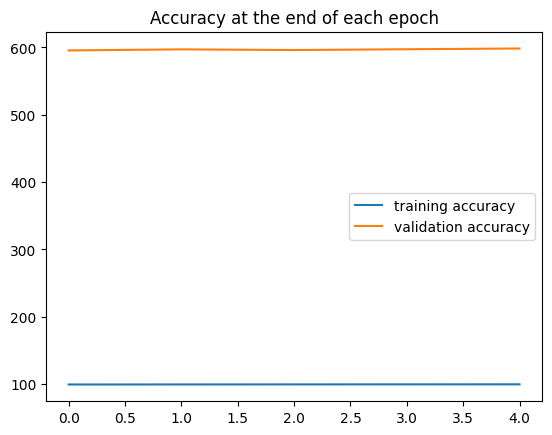

In [27]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();
plt.show()

In [28]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [29]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)  # we don't flatten the data this time
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [30]:
correct.item()

59845

In [31]:
correct.item()/len(test_data)


0.9974166666666666

In [32]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 991    0    0    0    0    0    1    0    0    2]
 [   0 1061    0    0    0    0    0    0    1    0]
 [   0    0  988    0    0    0    0    0    1    0]
 [   0    0    0 1026    0    0    0    0    0    1]
 [   0    0    0    0  981    0    0    0    0    6]
 [   0    0    0    3    0  914    1    0    0    2]
 [   0    1    0    0    0    1  965    0    1    0]
 [   0    2    1    1    1    0    0 1090    0    0]
 [   0    0    1    0    0    0    0    0 1006    0]
 [   0    0    0    0    1    0    0    0    0  950]]


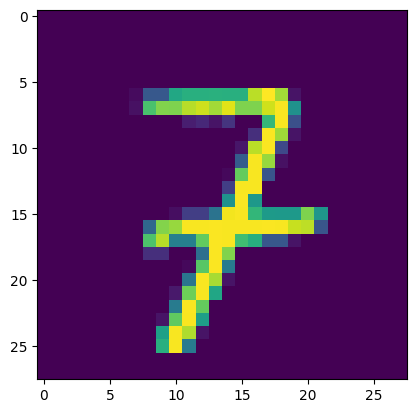

In [34]:
plt.imshow(test_data[2018][0].reshape(28,28))
plt.show()

In [41]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[2018][0].view(1,1,28,28))

In [42]:
new_prediction.argmax()


tensor(7)

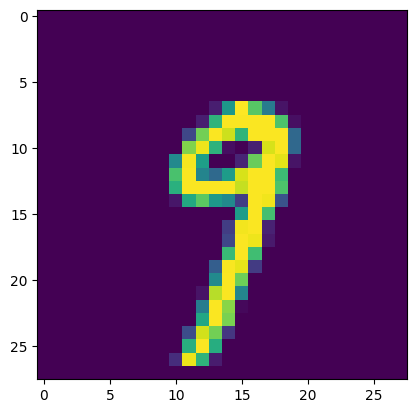

In [37]:
plt.imshow(test_data[133][0].reshape(28,28))
plt.show()

In [38]:
model.eval()
with torch.no_grad():
    new_prediction = model(test_data[333][0].view(1,1,28,28))

In [39]:
new_prediction.argmax()


tensor(8)

In [40]:
test_data[133][1]


9